0. Importing libraries and dataset

In [70]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')

In [71]:
dataset = pd.read_excel('1645792390_cep1_dataset.xlsx')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. Preliminary analysis

In [72]:
print('Dataset Dimentions: ',dataset.shape)

Dataset Dimentions:  (303, 14)


In [73]:
print('Null value check:\n',dataset.isnull().any())

Null value check:
 age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [74]:
print('\nUnique value check:\n',dataset.nunique())


Unique value check:
 age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [75]:
dataset.drop_duplicates(keep=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


2. EDA

a&b. 

In [76]:
#idetifying the numerical and categorical features
numerical_features=['age','trestbps','chol','thalach','oldpeak']
cols = dataset.columns.values.tolist()
for feature in numerical_features:
    cols.remove(feature)
categorical_features = copy.copy(cols)

In [77]:
#statistical summary of numerical features
dataset.drop(columns=categorical_features).describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


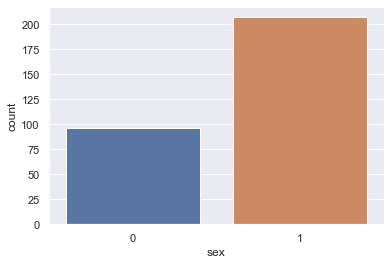

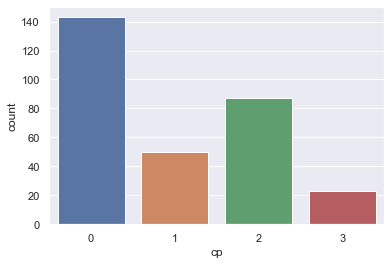

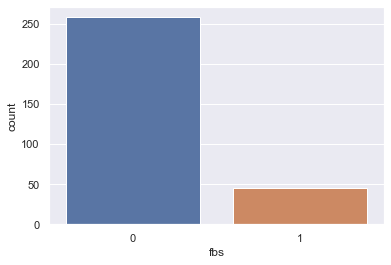

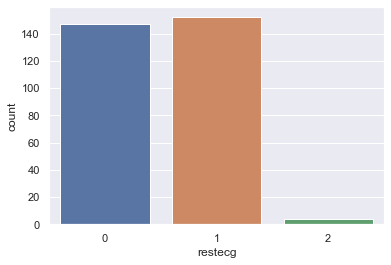

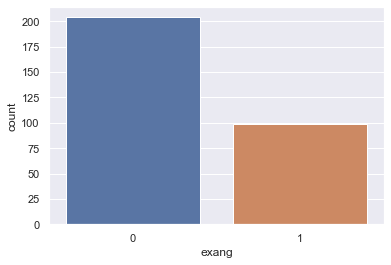

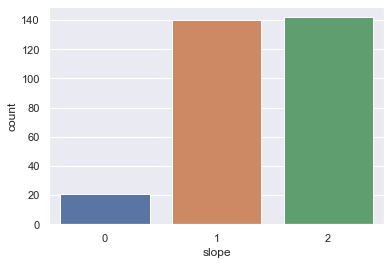

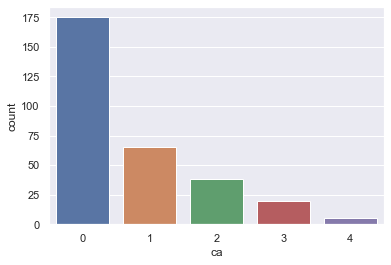

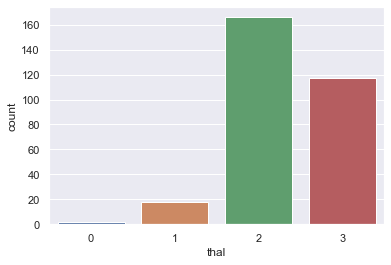

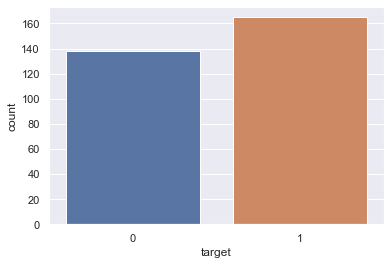

In [78]:
#count plots for categorical variables
sns.set()
for f in categorical_features:
    sns.countplot(dataset[f])
    plt.show()

In [79]:
#correlation analysis for numerical variables
f = plt.figure(figsize=(20,20))
corr = dataset.drop(columns=categorical_features).corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<Figure size 1440x1440 with 0 Axes>

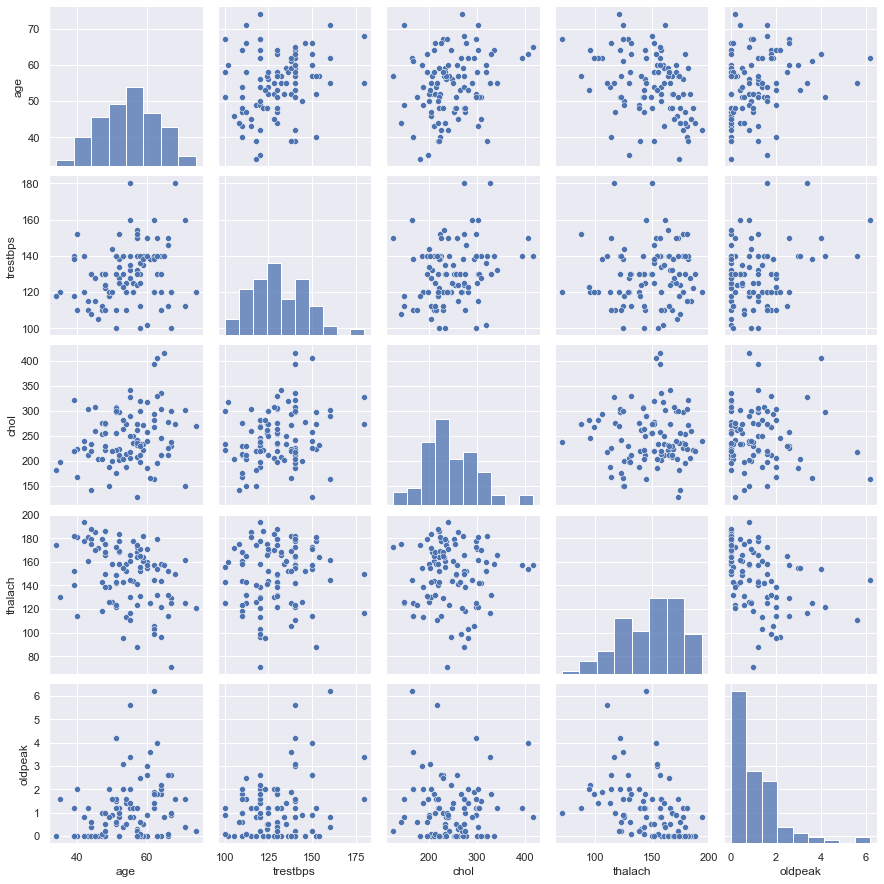

In [80]:
#distributions of numerical variables and scatter plots between variables 
sns.pairplot(dataset.drop(columns=categorical_features).sample(100))

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

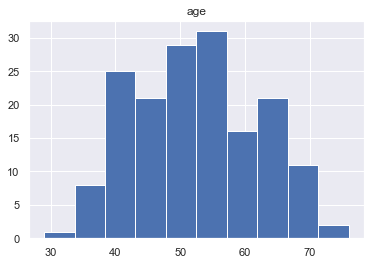

In [81]:
#Showing a histogram of CVD patients distributed by age
patients_by_age = dataset[['age','target']][dataset.target==1].drop(columns='target')
patients_by_age.hist()


array([[<AxesSubplot:title={'center':'sex'}>]], dtype=object)

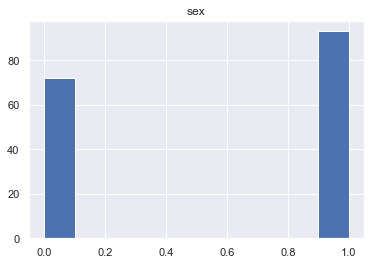

In [82]:
#Showing a histogram of CVD patients distributed by sex
patients_by_sex = dataset[['sex','target']][dataset.target==1].drop(columns='target')
patients_by_sex.hist()

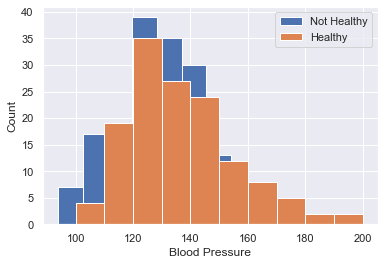

In [83]:
#Showing a histogram of CVD patients distributed by bloodpressure
patients_by_trestbps = dataset[['trestbps','target']][dataset.target==1].drop(columns='target')
healthy_patients_by_trestbps = dataset[['trestbps','target']][dataset.target==0].drop(columns='target')
plt.hist(patients_by_trestbps, label='Not Healthy')
plt.hist(healthy_patients_by_trestbps,label='Healthy')
plt.legend(loc='upper right')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.show()

In [84]:
#Pateints of CVD have
healthy_patients_by_trestbps.describe()


,trestbps
count,138.000000
mean,134.398551
std,18.729944
min,100.000000
25%,120.000000
50%,130.000000
75%,144.750000
max,200.000000


In [85]:
patients_by_trestbps.describe()

,trestbps
count,165.000000
mean,129.303030
std,16.169613
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,180.000000


In [86]:
#The relationship between Cholesterol and the target 
patients_by_chol = dataset[['chol','target']][dataset.target==1].drop(columns='target')
healthy_patients_by_chol = dataset[['chol','target']][dataset.target==0].drop(columns='target')

{'whiskers': [<matplotlib.lines.Line2D at 0x260df6e83d0>,
 'caps': [<matplotlib.lines.Line2D at 0x260df6e8970>,
 'boxes': [<matplotlib.lines.Line2D at 0x260df6e8100>],
 'medians': [<matplotlib.lines.Line2D at 0x260df6e8f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x260df6e91e0>],
 'means': []}

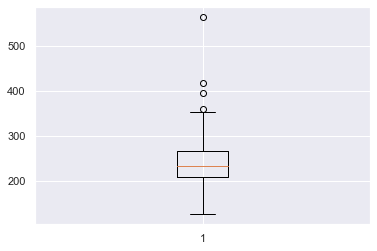

In [87]:
plt.boxplot(patients_by_chol)

{'whiskers': [<matplotlib.lines.Line2D at 0x260dfa35390>,
 'caps': [<matplotlib.lines.Line2D at 0x260dfa35930>,
 'boxes': [<matplotlib.lines.Line2D at 0x260dfa351e0>],
 'medians': [<matplotlib.lines.Line2D at 0x260dfa35ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x260dfa361a0>],
 'means': []}

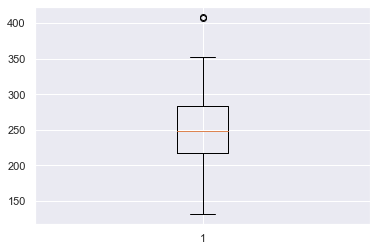

In [88]:
plt.boxplot(healthy_patients_by_chol)

The CVD patients seem to have many more outliers with a high colesterol 

array([[<AxesSubplot:title={'center':'exang'}>]], dtype=object)

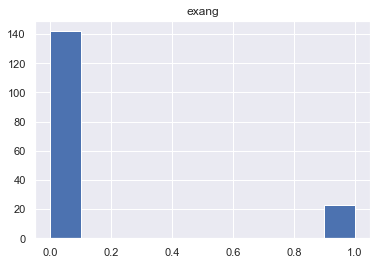

In [93]:
patients_by_exang = dataset[['exang','target']][dataset.target==1].drop(columns='target')
patients_by_exang.hist()

Diabetes is a significant complication of b-thalassaemia major. The aetiology includes iron overload causing b-cell destruction, autoimmunity, insulin resistance secondary to liver disease and development of type 1 or 2 diabetes. therefore, fasting blood sugar levels can give us a good indication to wether or not the patient has thalassaemia 

array([[<AxesSubplot:title={'center':'fbs'}>]], dtype=object)

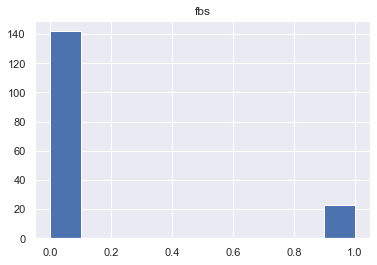

In [92]:
patients_by_bloodSugar = dataset[['fbs','target']][dataset.target==1].drop(columns='target')
patients_by_bloodSugar.hist()

This graph indicates a negative coorelation between blood sugar and CVD. Knowing this, it is possible to collect more data on the effects of thalassaemia on Cardio vascular health 

How the other factors determine the occurance of CVD:
1. cp: the type of chest pain can determine the Pressure, fullness, burning or tightness in the patient's chest
2. restecg: it determines if there is an abnormality in the rythym of the heart activity 

3. Model Building

In [89]:
#preprocessing features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
#Logistic regression model building and evaluation
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train, y_train)
LR_y_pred = LR_classifier.predict(X_test)
LR_cm = confusion_matrix(y_test, LR_y_pred)
print('Confusion Matrix:\n',LR_cm,'\n','Model Accuracy: ',accuracy_score(y_test, LR_y_pred)*100,'%')

Confusion Matrix:
 [[24  9]
 [ 4 39]] 
 Model Accuracy:  82.89473684210526 %


In [91]:
#Random Forest model building and evaluation
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
RF_classifier.fit(X_train, y_train)
RF_y_pred = RF_classifier.predict(X_test)
RF_cm = confusion_matrix(y_test, RF_y_pred)
print('Confusion Matrix:\n',RF_cm,'\n','Model Accuracy: ',accuracy_score(y_test, RF_y_pred)*100,'%')

Confusion Matrix:
 [[26  7]
 [ 4 39]] 
 Model Accuracy:  85.52631578947368 %
